## Отчёт об экспериментальном исследовании

### Цель

* Сравнить производительность алгоритма Хеллингса, матричного алгоритма Рустама Азимова и тензорного алгоритма для вычисления Контекстно-Свободных запросов достижимости на графах
* Проверить применимость указанных алгоритмов на практике
* Проверить влияет ли на производительность тензорного алгоритма представление грамматики

### Эксперимент

* [Датасет](https://drive.google.com/file/d/1lF20sF9-HmUoErdV2Z6VkFjpzdugOuC0/view?usp=sharing) состоит из графов и запросов, представленных Контекстно-Свободными грамматиками над метками соответствующих графов

* Характеристики ЭВМ:
    * ОС Ubuntu 20.04
    * Intel core i7-4790 CPU 3.60 GHz
    * DDR3 32Gb RAM

* Описание реализации:
    * `Hellings` --- реализация алгоритма Хеллингса
    * `Azimov` --- реализация матричного алгоритма Рустама Азимова
    * `TensorWithCNF` --- реализация тензорного алгоритма, принимающего грамматику в ОНФХ
    * `TensorWithRSM` --- реализация тензорного алгоритма, принимающего грамматику в виде Рекурсивного Автомата

* Описание замеров времени:
    * Для каждого графа один раз вычисляется время работы каждого запроса достижимости на четырёх реализациях алгоритмов
    * Для более подробной визуализации результатов время из микросекунд переводится в миллисекунды
    * Дополнительно, для каждого запроса вычисляется количество пар достижимостей, что сохраняется в поле `Control sum`

### Выводы

* На всех полученных результатах матричный алгоритм показал время значительно лучшее, чем время остальных алгоритмов
* Гипотеза о том, что матричный алгоритм является наиболее подходящим для практического применения -- подтвердилась, так как он показал лучшее время на большей части графов
* Гипотеза о применимости на практике тензорного алгоритма -- не подтвердилась, так как на большей части графов он показал время значительно худшее, чем время матричного алгоритма
* Гипотеза о применимости на практике алгоритма Хеллингса -- не подтвердилась, так как на большей части графов он показал время значительно худшее, чем время остальных алгоритмов
* Гипотеза о том, что тензорный алгоритм, принимающию грамматику в виде Рекурсивного Автомата, работает быстрее тензорного алгоритма, принимающего грамматику в ОНФХ, подтвердилась, хотя и различие времён можно счесть назначительным


## Результаты для графов

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from glob import glob
from pathlib import Path
from IPython.display import display

sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})

graphs = ['FullGraph.csv', 'WorstCase.csv', 'MemoryAliases.csv']

In [45]:
for graph in graphs:
    df = pd.read_csv(graph)
    df['Time (in milliseconds)'] = df['Time (in microseconds)'] / 1e3
    df = df.drop(['Time (in microseconds)'], axis=1)
    display(df.sort_values(by=['Grammar', 'Algorithm']))

,Algorithm,Graph,Graph filename,Grammar,Control sum,Time (in milliseconds)
7,Azimov,FullGraph,fullgraph_50,g1,2500,3.455
9,Azimov,FullGraph,fullgraph_10,g1,100,1.070
11,Azimov,FullGraph,fullgraph_100,g1,10000,9.366
1,Hellings,FullGraph,fullgraph_50,g1,2500,327.617
3,Hellings,FullGraph,fullgraph_10,g1,100,1.480
5,Hellings,FullGraph,fullgraph_100,g1,10000,5179.025
13,TensorWithCNF,FullGraph,fullgraph_50,g1,2500,225.726
15,TensorWithCNF,FullGraph,fullgraph_10,g1,100,5.416
17,TensorWithCNF,FullGraph,fullgraph_100,g1,10000,1602.988
19,TensorWithRSM,FullGraph,fullgraph_50,g1,2500,8.552


,Algorithm,Graph,Graph filename,Grammar,Control sum,Time (in milliseconds)
6,Azimov,WorstCase,worstcase_32,g1,272,4.176
7,Azimov,WorstCase,worstcase_128,g1,4160,16.683
8,Azimov,WorstCase,worstcase_64,g1,1056,7.394
9,Azimov,WorstCase,worstcase_16,g1,72,2.694
10,Azimov,WorstCase,worstcase_4,g1,6,1.633
11,Azimov,WorstCase,worstcase_8,g1,20,2.008
0,Hellings,WorstCase,worstcase_32,g1,272,55.739
1,Hellings,WorstCase,worstcase_128,g1,4160,29510.916
2,Hellings,WorstCase,worstcase_64,g1,1056,1149.756
3,Hellings,WorstCase,worstcase_16,g1,72,5.316


,Algorithm,Graph,Graph filename,Grammar,Control sum,Time (in milliseconds)
11,Azimov,MemoryAliases,ls,g1,854,46.457
13,Azimov,MemoryAliases,pr,g1,385,21.509
15,Azimov,MemoryAliases,wc,g1,156,11.179
17,Azimov,MemoryAliases,bzip2,g1,315,24.630
19,Azimov,MemoryAliases,gzip,g1,1458,42.093
1,Hellings,MemoryAliases,ls,g1,854,61926.036
3,Hellings,MemoryAliases,pr,g1,385,5146.558
5,Hellings,MemoryAliases,wc,g1,156,327.337
7,Hellings,MemoryAliases,bzip2,g1,315,4889.644
9,Hellings,MemoryAliases,gzip,g1,1458,54876.670


In [46]:
all_dfs = dict()

for graph in graphs:
    df = pd.read_csv(graph)
    df['Time (in milliseconds)'] = df['Time (in microseconds)'] / 1e3
    df = df.drop(['Time (in microseconds)', 'Control sum'], axis=1)
    all_dfs[graph.split('.')[0]] = df

In [47]:
def get_barplot(graph, grammar, order=None):
    cur_df = all_dfs[graph][(all_dfs[graph]['Graph'] == graph) & (all_dfs[graph]['Grammar'] == grammar)]
    if not order:
        order = np.sort(cur_df['Graph filename'].unique())
    plot = sns.barplot(x='Graph filename', y='Time (in milliseconds)', hue='Algorithm', order=order, data=cur_df)
    plot.set_yscale('log')
    plot.set_title(f'{graph} Graph, Grammar = <{grammar}>')
    plot.set(xlabel='Graph', ylabel='Time (in milliseconds)')
    return plot

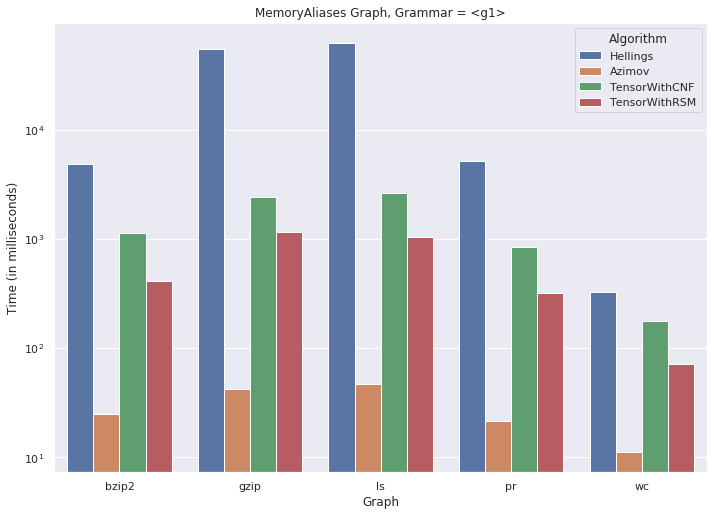

In [48]:
get_barplot('MemoryAliases', 'g1');

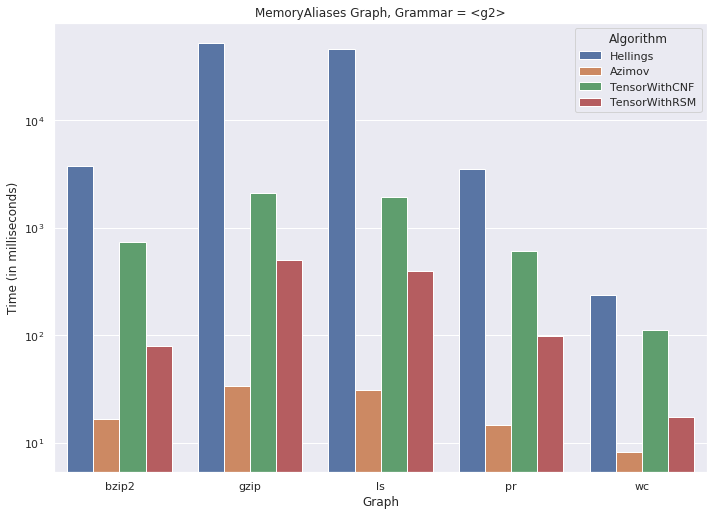

In [49]:
get_barplot('MemoryAliases', 'g2');

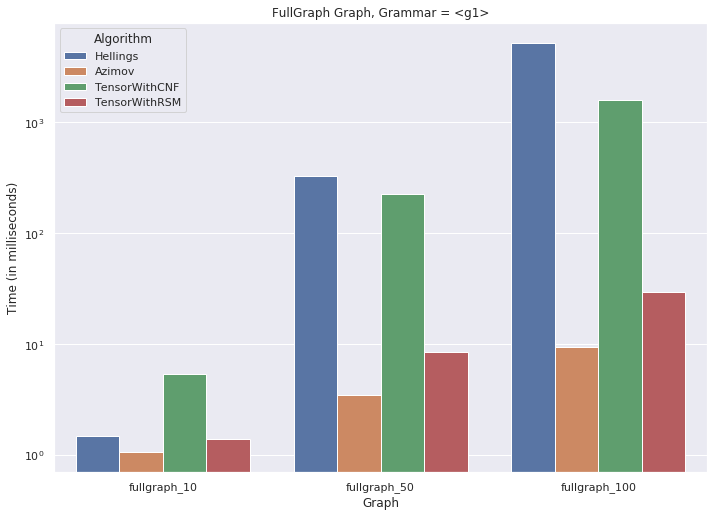

In [50]:
get_barplot('FullGraph', 'g1', ['fullgraph_10', 'fullgraph_50', 'fullgraph_100']);

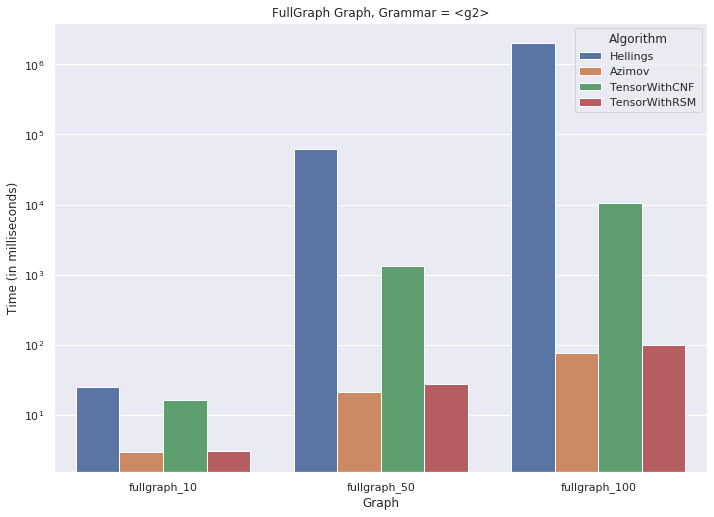

In [51]:
get_barplot('FullGraph', 'g2', ['fullgraph_10', 'fullgraph_50', 'fullgraph_100']);

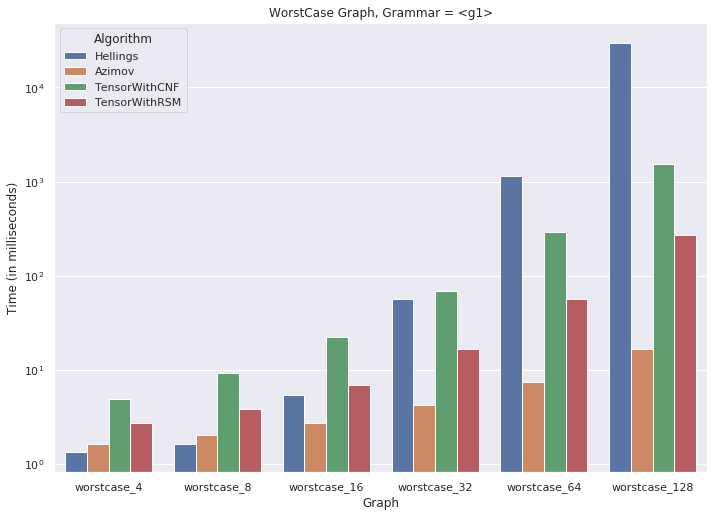

In [52]:
get_barplot('WorstCase', 'g1', [f'worstcase_{x}' for x in [4, 8, 16, 32, 64, 128]]);